# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%

10.Evaluation Step

11.Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers

In [161]:
#data loading
dataset = pd.read_csv("Datasets/creditcard_data.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [162]:
#missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [163]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [165]:
label = dataset.pop("Class")

In [166]:
print(label[label == 0].count())
print(label[label == 1].count())

284315
492


In [167]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [168]:
#standardization / Normalization

mean = dataset.mean(axis=0)
dataset -= mean
std = dataset.std(axis=0)
dataset /= std

In [169]:
#Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

len(dataset)
train_data = dataset.iloc[:142403]
val_data = dataset.iloc[142403:227845]
test_data = dataset.iloc[227845:]

len(label)
train_labels = label.iloc[:142403]
val_labels = label.iloc[142403:227845]
test_labels = label.iloc[227845:]

In [170]:
print( train_labels[train_labels == 1] )
print( train_labels[train_labels == 0] )

print( test_labels[test_labels == 1] )
print( test_labels[test_labels == 0] )

541       1
623       1
4920      1
6108      1
6329      1
         ..
140786    1
141257    1
141258    1
141259    1
141260    1
Name: Class, Length: 269, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
142398    0
142399    0
142400    0
142401    0
142402    0
Name: Class, Length: 142134, dtype: int64
229712    1
229730    1
230076    1
230476    1
231978    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 75, dtype: int64
227845    0
227846    0
227847    0
227848    0
227849    0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 56887, dtype: int64


In [171]:
#Data Preprocessing

train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy().astype('float32')

val_data = val_data.to_numpy()
val_labels = val_labels.to_numpy().astype('float32')

test_data =test_data.to_numpy()
test_labels = test_labels.to_numpy().astype('float32')

In [172]:
train_data.shape

(142403, 30)

In [173]:
train_labels.shape

(142403,)

In [174]:
print( train_labels[train_labels == 1] )
print( test_labels[test_labels == 1] )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [175]:
#Model: input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(30,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [176]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [177]:
#model compilation - loss and metrics

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [191]:
#model training - 100 epochs

history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_data=(val_data, val_labels))

Train on 142403 samples, validate on 85442 samples
Epoch 1/20
142403/142403 [==============================] - 3s 21us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.4647 - val_acc: 0.8475
Epoch 2/20
142403/142403 [==============================] - 3s 18us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.4621 - val_acc: 0.8497
Epoch 3/20
142403/142403 [==============================] - 3s 21us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.4849 - val_acc: 0.8434
Epoch 4/20
142403/142403 [==============================] - 4s 27us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.4744 - val_acc: 0.8420
Epoch 5/20
142403/142403 [==============================] - 4s 29us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.5070 - val_acc: 0.8415
Epoch 6/20
142403/142403 [==============================] - 3s 24us/sample - loss: 0.0022 - acc: 0.9996 - val_loss: 0.5019 - val_acc: 0.8347
Epoch 7/20
142403/142403 [==============================] - 3s 20us/sample - loss: 0.0022 - acc: 0.9995

In [195]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

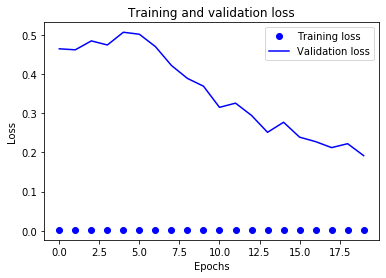

In [196]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

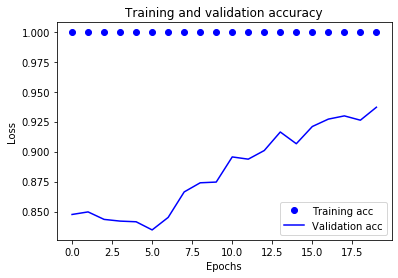

In [197]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [198]:
#evaluation

eval_score = model.evaluate(test_data, test_labels)

56962/56962 [==============================] - 3s 59us/sample - loss: 1.6351 - acc: 0.5780


In [199]:
eval_score

[1.6350740992152268, 0.57799935]

In [200]:
#prediction

pred_score = model.predict(test_data)
len(pred_score)
pred_score

array([[4.7233322e-01],
       [7.1001643e-01],
       [1.7840686e-06],
       ...,
       [9.9943906e-01],
       [9.8139048e-01],
       [9.7964740e-01]], dtype=float32)

In [201]:
g_pred = (pred_score > 0.5)

print (tf.math.confusion_matrix(
    test_labels, g_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
    ))

print ( np.count_nonzero(g_pred) )

tf.Tensor(
[[32857 24030]
 [    8    67]], shape=(2, 2), dtype=int32)
24097


# tanh (activation function)

In [202]:
#Model: input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

model = models.Sequential()
model.add(layers.Dense(10, activation='tanh', input_shape=(30,)))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(6, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

#model compilation - loss and metrics

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#model training - 100 epochs

history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_data=(val_data, val_labels))

Train on 142403 samples, validate on 85442 samples
Epoch 1/20
142403/142403 [==============================] - 5s 37us/sample - loss: 0.0782 - acc: 0.9815 - val_loss: 1.3107 - val_acc: 0.5717
Epoch 2/20
142403/142403 [==============================] - 2s 13us/sample - loss: 0.0040 - acc: 0.9993 - val_loss: 1.4545 - val_acc: 0.6116
Epoch 3/20
142403/142403 [==============================] - 2s 15us/sample - loss: 0.0034 - acc: 0.9994 - val_loss: 1.4346 - val_acc: 0.6324
Epoch 4/20
142403/142403 [==============================] - 2s 13us/sample - loss: 0.0032 - acc: 0.9994 - val_loss: 1.2055 - val_acc: 0.6725
Epoch 5/20
142403/142403 [==============================] - 2s 17us/sample - loss: 0.0031 - acc: 0.9994 - val_loss: 0.9735 - val_acc: 0.7149
Epoch 6/20
142403/142403 [==============================] - 2s 14us/sample - loss: 0.0030 - acc: 0.9994 - val_loss: 0.9594 - val_acc: 0.7182
Epoch 7/20
142403/142403 [==============================] - 2s 16us/sample - loss: 0.0029 - acc: 0.9995

In [203]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

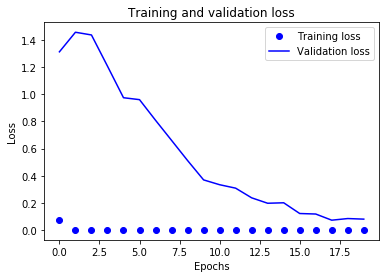

In [204]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

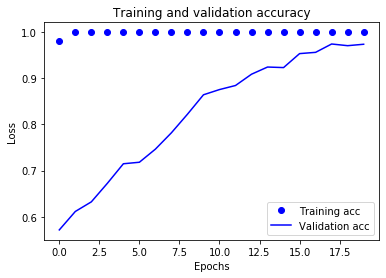

In [205]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()